# Vaccination Predictor

In [1]:
!pip install scikit-multilearn

## Importing the required libraries

In [2]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

## Loading the dataset into the dataframe

In [3]:
df1 = pd.read_csv('/kaggle/input/flu-data/H1N1_Flu_Vaccines.csv', delimiter=',')
features = df1.iloc[:,:-2]
labels = df1.iloc[:,[36,37]]

In [4]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
labels.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


## Checking the shape of dataset

In [6]:
features.shape

(26707, 36)

#### There are 36 features so either we should do PCA or feature selection.

In [7]:
labels.shape

(26707, 2)

## Checking the data types

In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

#### We need to encode the object to int

In [9]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 417.4 KB


# DATA PRE-PROCESSING

# Checking for duplicates in dataset

In [10]:
features.duplicated().sum()

0

#### There no duplicates in dataset.

In [11]:
labels.duplicated().sum()

26703

## Checking for missing values in dataset

In [12]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

#### There are lots of missing value so we need to impute them.

In [13]:
labels.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## Filling the missing values

In [14]:
# For float fill missing values with the mean

features = features.fillna(features.mean())
features = round(features)

# For string fill missing value with 'No Category'

features = features.fillna('No Category')

In [15]:
features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## Finding the unique values of features

In [16]:
# For Datatype = float

print("h1n1_concern")
print(features.h1n1_concern.unique())

print("h1n1_knowledge")
print(features.h1n1_knowledge.unique())

print("behavioral_antiviral_meds")
print(features.behavioral_antiviral_meds.unique())

print("behavioral_avoidance")
print(features.behavioral_avoidance.unique())

print("behavioral_face_mask")
print(features.behavioral_face_mask.unique())

print("behavioral_wash_hands")
print(features.behavioral_wash_hands.unique())

print("behavioral_large_gatherings")
print(features.behavioral_large_gatherings.unique())

print("behavioral_outside_home")
print(features.behavioral_outside_home.unique())

print("behavioral_touch_face")
print(features.behavioral_touch_face.unique())

print("doctor_recc_h1n1")
print(features.doctor_recc_h1n1.unique())

print("doctor_recc_seasonal")
print(features.doctor_recc_seasonal.unique())

print("chronic_med_condition")
print(features.chronic_med_condition.unique())

print("child_under_6_months")
print(features.child_under_6_months.unique())

print("health_worker")
print(features.health_worker.unique())

print("health_insurance")
print(features.health_insurance.unique())

print("opinion_h1n1_vacc_effective")
print(features.opinion_h1n1_vacc_effective.unique())

print("opinion_h1n1_risk")
print(features.opinion_h1n1_risk.unique())

print("opinion_h1n1_sick_from_vacc")
print(features.opinion_h1n1_sick_from_vacc.unique())

print("opinion_seas_vacc_effective")
print(features.opinion_seas_vacc_effective.unique())

print("opinion_seas_risk")
print(features.opinion_seas_risk.unique())

print("opinion_seas_sick_from_vacc")
print(features.opinion_seas_sick_from_vacc.unique())

h1n1_concern
[1. 3. 2. 0.]
h1n1_knowledge
[0. 2. 1.]
behavioral_antiviral_meds
[0. 1.]
behavioral_avoidance
[0. 1.]
behavioral_face_mask
[0. 1.]
behavioral_wash_hands
[0. 1.]
behavioral_large_gatherings
[0. 1.]
behavioral_outside_home
[1. 0.]
behavioral_touch_face
[1. 0.]
doctor_recc_h1n1
[0. 1.]
doctor_recc_seasonal
[0. 1.]
chronic_med_condition
[0. 1.]
child_under_6_months
[0. 1.]
health_worker
[0. 1.]
health_insurance
[1. 0.]
opinion_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
opinion_h1n1_risk
[1. 4. 3. 2. 5.]
opinion_h1n1_sick_from_vacc
[2. 4. 1. 5. 3.]
opinion_seas_vacc_effective
[2. 4. 5. 3. 1.]
opinion_seas_risk
[1. 2. 4. 3. 5.]
opinion_seas_sick_from_vacc
[2. 4. 1. 5. 3.]


In [17]:
# For Datatype = object

print("age_group")
print(features.age_group.unique())

print("education")
print(features.education.unique())

print("race")
print(features.race.unique())

print("income_poverty")
print(features.income_poverty.unique())

print("marital_status")
print(features.marital_status.unique())

print("rent_or_own")
print(features.rent_or_own.unique())

print("employment_status")
print(features.employment_status.unique())

print("hhs_geo_region")
print(features.hhs_geo_region.unique())

print("census_msa")
print(features.census_msa.unique())

print("employment_industry")
print(features.employment_industry.unique())

print("employment_occupation")
print(features.employment_occupation.unique())

age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_poverty
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
rent_or_own
['Own' 'Rent' 'No Category']
employment_status
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
hhs_geo_region
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
['No Category' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation
['No Category' 'xgw

## Encoding the object

In [18]:
enc = LabelEncoder()

In [19]:
features.age_group = enc.fit_transform(features.age_group)
features.education = enc.fit_transform(features.education)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_poverty = enc.fit_transform(features.income_poverty)
features.marital_status = enc.fit_transform(features.marital_status)
features.rent_or_own = enc.fit_transform(features.rent_or_own)
features.employment_status = enc.fit_transform(features.employment_status)
features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
features.census_msa = enc.fit_transform(features.census_msa)
features.employment_industry = enc.fit_transform(features.employment_industry)
features.employment_occupation = enc.fit_transform(features.employment_occupation)

In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

## Checking the dataset

In [21]:
features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,2,1,2,8,2,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2,2,0,1,0,0.0,0.0,13,20
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,2.0,0.0,15,22
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,2,2,2,5,1,0.0,0.0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,9,0,1.0,0.0,19,6
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,2.0,3.0,16,19
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,0.0,0.0,20,22
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,1,2,2.0,0.0,13,21
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,1,0,1,0,1.0,0.0,20,2
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,2,1,2,9,0,0.0,0.0,0,0


# EXPLORATORY DATA ANALYSIS

## Checking the statistical information

In [22]:
features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,0.953795,0.932190,1.145542,0.984161,4.829745,0.833489,0.887558,0.538922,5.290710,6.242371
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.113444,0.970936,0.526582,1.052723,2.805984,0.823313,0.749980,0.924918,7.079824,7.957241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,7.000000,2.000000,1.000000,1.000000,9.000000,11.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,3.000000,9.000000,2.000000,3.000000,3.000000,21.000000,23.000000


## Finding the outliers in dataset

In [23]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [24]:
print(len(findoutliers(features.household_adults)))
print(len(findoutliers(features.household_children)))

1125
1747


In [25]:
findoutliers(features.household_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [26]:
findoutliers(features.household_children)

array([3., 3., 3., ..., 3., 3., 3.])

<AxesSubplot:xlabel='household_adults'>

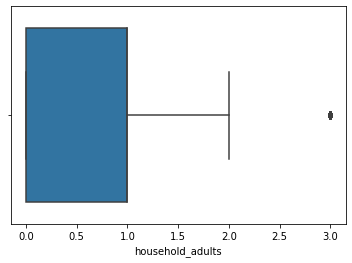

In [27]:
# Visualising the outliers
sns.boxplot(features.household_adults)

<AxesSubplot:xlabel='household_children'>

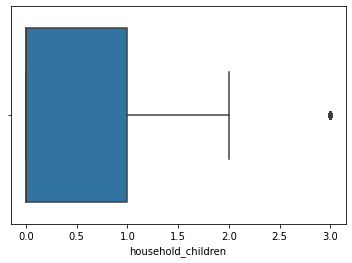

In [28]:
sns.boxplot(features.household_children)

#### There are outliers in the dataset but we are not removing them as some algorithms are not sensitive to outliers

# Visualising numerical data

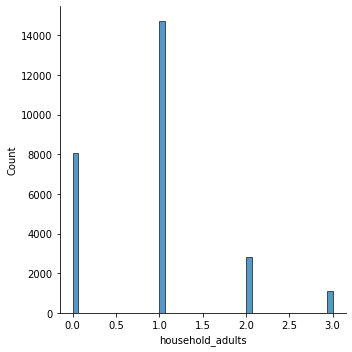

In [29]:
sns.displot(features.household_adults)

#### Number of other adults in household is mostly 1.

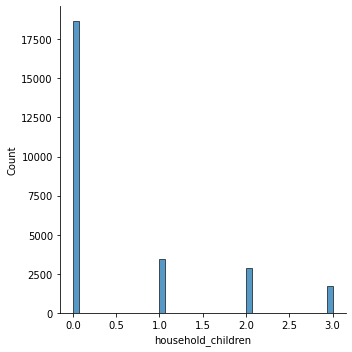

In [30]:
sns.displot(features.household_children)

#### Number of children in household is mostly 0.

## Visualising categorical data

In [31]:
features.h1n1_concern.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

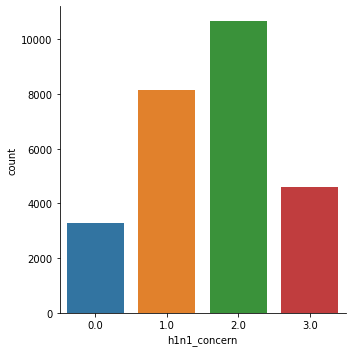

In [32]:
sns.factorplot('h1n1_concern', data = features, kind = "count")

#### Most of the people are somewhat concerned about h1n1 vaccine.

In [33]:
features.h1n1_knowledge.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

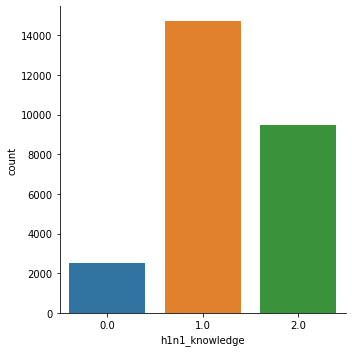

In [34]:
sns.factorplot('h1n1_knowledge', data = features, kind = "count")

#### Almost 90% of people have little or lots of knowledge about h1n1 vaccine.

In [35]:
features.behavioral_antiviral_meds.value_counts()

0.0    25406
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

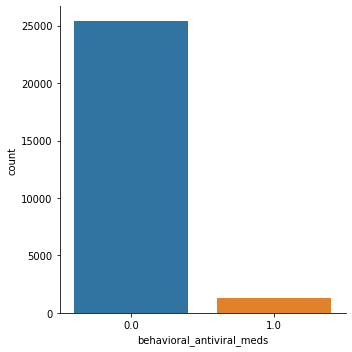

In [36]:
sns.factorplot('behavioral_antiviral_meds', data = features, kind = "count")

#### Almost non of the people took antiviral medications.

In [37]:
features.behavioral_avoidance.value_counts()

1.0    19436
0.0     7271
Name: behavioral_avoidance, dtype: int64

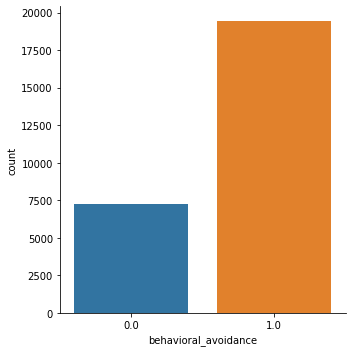

In [38]:
sns.factorplot('behavioral_avoidance', data = features, kind = "count")

#### 70% of people have avoided contact with people with symptoms.

In [39]:
features.behavioral_face_mask.value_counts()

0.0    24866
1.0     1841
Name: behavioral_face_mask, dtype: int64

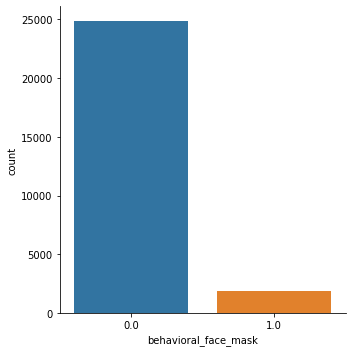

In [40]:
sns.factorplot('behavioral_face_mask', data = features, kind = "count")

#### Very few people have bought a face mask.

In [41]:
features.behavioral_wash_hands.value_counts()

1.0    22057
0.0     4650
Name: behavioral_wash_hands, dtype: int64

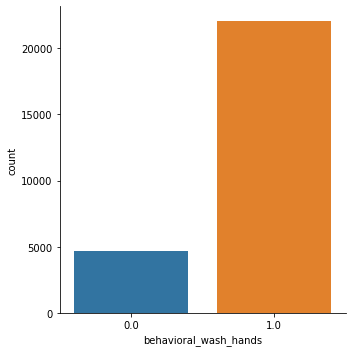

In [42]:
sns.factorplot('behavioral_wash_hands', data = features, kind = "count")

#### 80% of people have frequently washed their hands.

In [43]:
features.behavioral_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

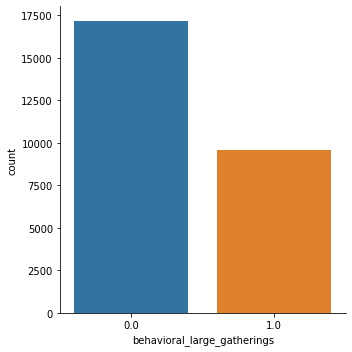

In [44]:
sns.factorplot('behavioral_large_gatherings', data = features, kind = "count")

#### Few people have reduced time at large gatherings.

In [45]:
features.behavioral_outside_home.value_counts()

0.0    17726
1.0     8981
Name: behavioral_outside_home, dtype: int64

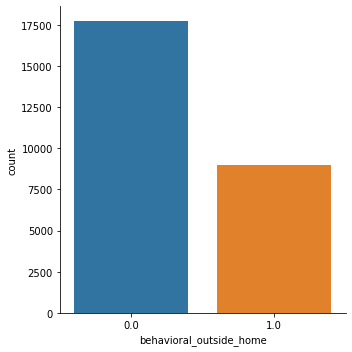

In [46]:
sns.factorplot('behavioral_outside_home', data = features, kind = "count")

#### Only few people have reduced contact with people outside their household.

In [47]:
features.behavioral_touch_face.value_counts()

1.0    18129
0.0     8578
Name: behavioral_touch_face, dtype: int64

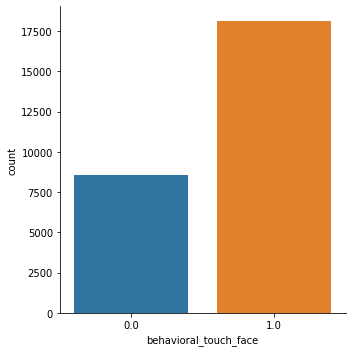

In [48]:
sns.factorplot('behavioral_touch_face', data = features, kind = "count")

#### 70% of people have avoided touching eyes, nose, or mouth.

In [49]:
features.doctor_recc_h1n1.value_counts()

0.0    21299
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

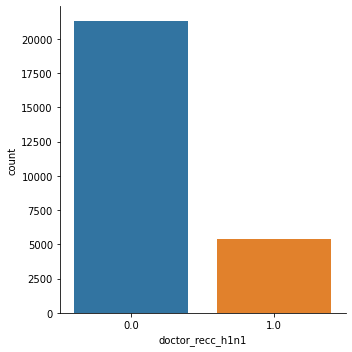

In [50]:
sns.factorplot('doctor_recc_h1n1', data = features, kind = "count")

#### Doctors recommended the h1n1 vaccine to only 20% of people.

In [51]:
features.doctor_recc_seasonal.value_counts()

0.0    18613
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

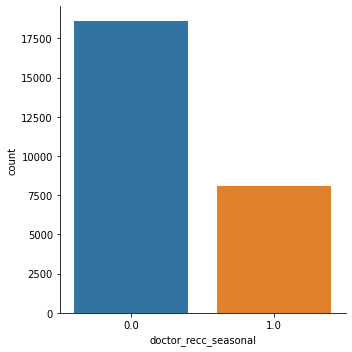

In [52]:
sns.factorplot('doctor_recc_seasonal', data = features, kind = "count")

#### Doctors recommended seasonal vaccine to only 30% of people.

In [53]:
features.chronic_med_condition .value_counts()

0.0    19417
1.0     7290
Name: chronic_med_condition, dtype: int64

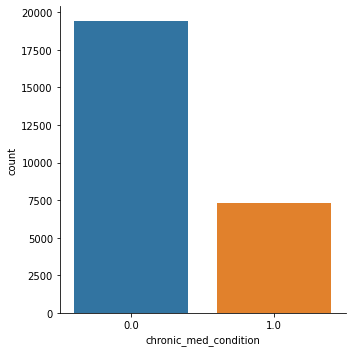

In [54]:
sns.factorplot('chronic_med_condition', data = features, kind = "count")

#### Only less than 30% of people have chronic medical conditions.

In [55]:
features.child_under_6_months.value_counts()

0.0    24569
1.0     2138
Name: child_under_6_months, dtype: int64

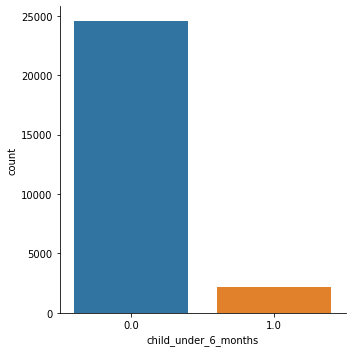

In [56]:
sns.factorplot('child_under_6_months', data = features, kind = "count")

#### Very few people had close contact with child under 6 months.

In [57]:
features.health_worker.value_counts()

0.0    23808
1.0     2899
Name: health_worker, dtype: int64

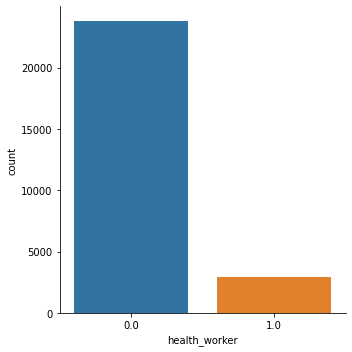

In [58]:
sns.factorplot('health_worker', data = features, kind = "count")

#### Very few people work in healthcare.

In [59]:
features.health_insurance.value_counts()

1.0    24971
0.0     1736
Name: health_insurance, dtype: int64

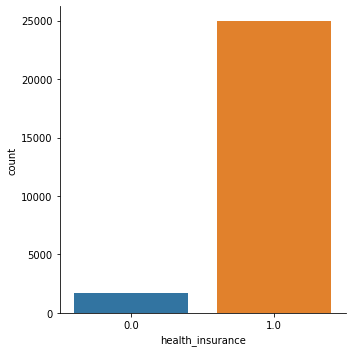

In [60]:
sns.factorplot('health_insurance', data = features, kind = "count")

#### Almost everyone has health insurance.

In [61]:
features.opinion_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64

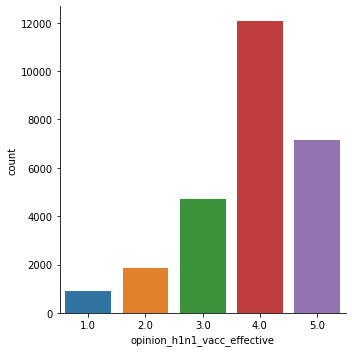

In [62]:
sns.factorplot('opinion_h1n1_vacc_effective', data = features, kind = "count")

#### Most of the people think h1n1 is somewhat effective.

In [63]:
features.opinion_h1n1_risk.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: opinion_h1n1_risk, dtype: int64

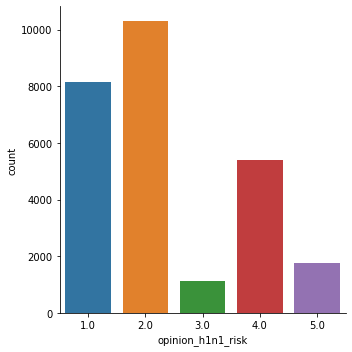

In [64]:
sns.factorplot('opinion_h1n1_risk', data = features, kind = "count")

#### Most people believe the h1n1 vaccine has somewhat low or very low risk.

In [65]:
features.opinion_h1n1_sick_from_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

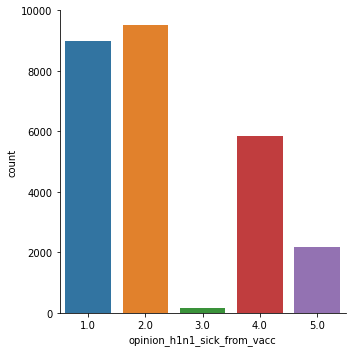

In [66]:
sns.factorplot('opinion_h1n1_sick_from_vacc', data = features, kind = "count")

#### Most people are not at all worried or not very worried of getting sick from h1n1 vaccine.

In [67]:
features.opinion_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

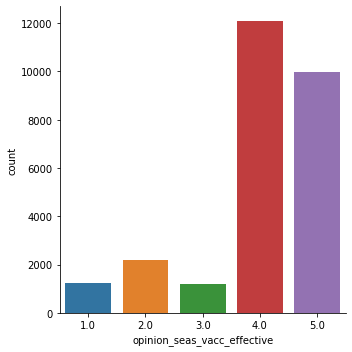

In [68]:
sns.factorplot('opinion_seas_vacc_effective', data = features, kind = "count")

#### Most people think seasonal vaccine is somewhat or very effective.

In [69]:
features.opinion_seas_risk.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0    1191
Name: opinion_seas_risk, dtype: int64

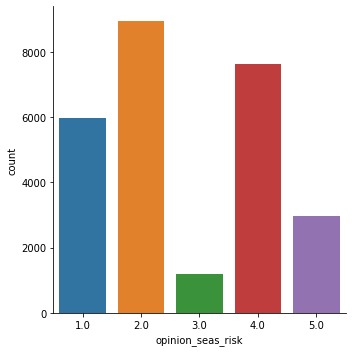

In [70]:
sns.factorplot('opinion_seas_risk', data = features, kind = "count")

#### Majority of people think the riske of seasonal vaccine are somewhat low.

In [71]:
features.opinion_seas_sick_from_vacc.value_counts()

1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

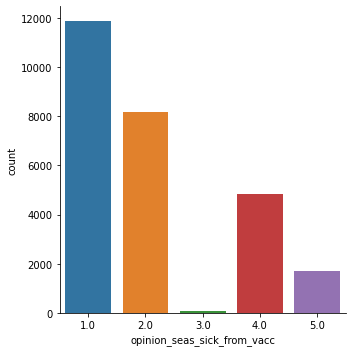

In [72]:
sns.factorplot('opinion_seas_sick_from_vacc', data = features, kind = "count")

#### Majority of people are not at all worried of getting sick from seasonal vaccine.

## Visualising labels

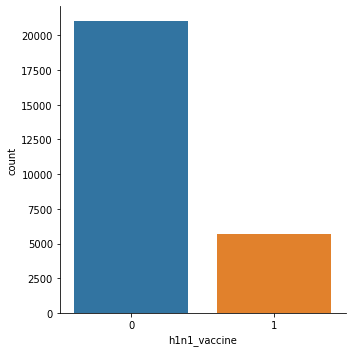

In [73]:
sns.factorplot('h1n1_vaccine', data = labels, kind = "count")

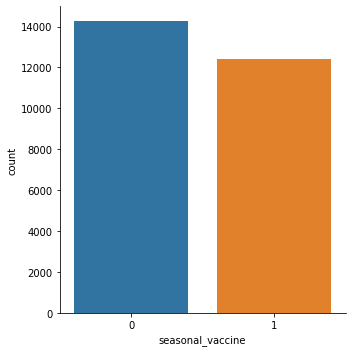

In [74]:
sns.factorplot('seasonal_vaccine', data = labels, kind = "count")

# FEATURE SCALING

## Using Min Max scaler

In [75]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [76]:
features = pd.DataFrame(features)
col_name = ['respondent_id','h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']
features.columns = col_name

# FEATURE SELECTION

## Independent and target variables

In [77]:
X = features
y = labels

## Applying SelectKBest class

In [78]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [79]:
fit = bestfeatures.fit(X,y)

In [80]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))

                          Specs        Score
10             doctor_recc_h1n1  3053.800622
11         doctor_recc_seasonal  1996.956823
20            opinion_seas_risk   955.527767
17            opinion_h1n1_risk   860.855483
14                health_worker   734.683080
12        chronic_med_condition   434.146217
22                    age_group   275.441773
19  opinion_seas_vacc_effective   239.944014
16  opinion_h1n1_vacc_effective   183.444477
35        employment_occupation   133.854404
5          behavioral_face_mask   130.338924
1                  h1n1_concern   110.778669
34          employment_industry   106.757274
33           household_children   101.673318
9         behavioral_touch_face    99.843817
13         child_under_6_months    88.478443
2                h1n1_knowledge    74.928836
25                          sex    55.699952
6         behavioral_wash_hands    51.676080
27               marital_status    46.115123
18  opinion_h1n1_sick_from_vacc    43.386989
7   behavi

In [81]:
features_kbest = features.iloc[:,[9,10,19,16,13,11,21,18,15,34,0,33,32,8,12,1,24,5,26,17,6,3,7,2,4]]

## Feature importance using ExtraTrees Classifier

[0.03968235 0.03014472 0.02553995 0.00784179 0.0171015  0.00961357
 0.01250865 0.01810117 0.01802049 0.01695114 0.05662018 0.05881195
 0.01732012 0.01057938 0.01783217 0.00743498 0.03890299 0.04452209
 0.02989861 0.05879598 0.07309286 0.0299075  0.04834444 0.0289732
 0.01954087 0.02066779 0.02699243 0.01938359 0.01971274 0.01620523
 0.03725124 0.02884083 0.02495389 0.02115919 0.02407626 0.02467415]


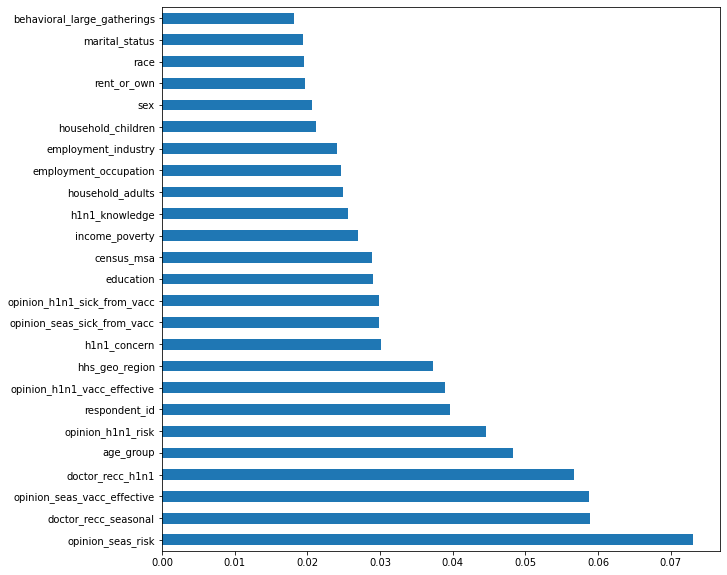

In [82]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [83]:
features_tree = features.loc[:,['opinion_seas_risk','doctor_recc_seasonal','opinion_seas_vacc_effective',
                                 'doctor_recc_h1n1','age_group','opinion_h1n1_risk','hhs_geo_region',
                                 'opinion_h1n1_vacc_effective','h1n1_concern','opinion_seas_sick_from_vacc',
                                 'opinion_h1n1_sick_from_vacc','census_msa','education','income_poverty',
                                 'h1n1_knowledge','household_adults','employment_occupation',
                                 'employment_industry','household_children','sex','race','marital_status',
                                 'rent_or_own','behavioral_outside_home','behavioral_large_gatherings']]

## Correlation Matrix using Heatmap

In [84]:
features.corrwith(labels.h1n1_vaccine)

respondent_id                 -0.003280
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
behavioral_antiviral_meds      0.040226
behavioral_avoidance           0.046837
behavioral_face_mask           0.070413
behavioral_wash_hands          0.074570
behavioral_large_gatherings    0.018089
behavioral_outside_home        0.022080
behavioral_touch_face          0.070855
doctor_recc_h1n1               0.394086
doctor_recc_seasonal           0.218976
chronic_med_condition          0.094360
child_under_6_months           0.066712
health_worker                  0.168056
health_insurance               0.041891
opinion_h1n1_vacc_effective    0.267352
opinion_h1n1_risk              0.320580
opinion_h1n1_sick_from_vacc    0.074580
opinion_seas_vacc_effective    0.177799
opinion_seas_risk              0.255955
opinion_seas_sick_from_vacc    0.008415
age_group                      0.041074
education                      0.020766
race                           0.041061


In [85]:
features.corrwith(labels.seasonal_vaccine)

respondent_id                 -0.004652
h1n1_concern                   0.154488
h1n1_knowledge                 0.119779
behavioral_antiviral_meds      0.006013
behavioral_avoidance           0.076130
behavioral_face_mask           0.050020
behavioral_wash_hands          0.112254
behavioral_large_gatherings    0.063722
behavioral_outside_home        0.053287
behavioral_touch_face          0.119925
doctor_recc_h1n1               0.198560
doctor_recc_seasonal           0.360696
chronic_med_condition          0.169465
child_under_6_months           0.013424
health_worker                  0.126977
health_insurance               0.124929
opinion_h1n1_vacc_effective    0.203187
opinion_h1n1_risk              0.215650
opinion_h1n1_sick_from_vacc    0.027964
opinion_seas_vacc_effective    0.358869
opinion_seas_risk              0.385668
opinion_seas_sick_from_vacc   -0.060538
age_group                      0.277454
education                      0.002553
race                           0.101743


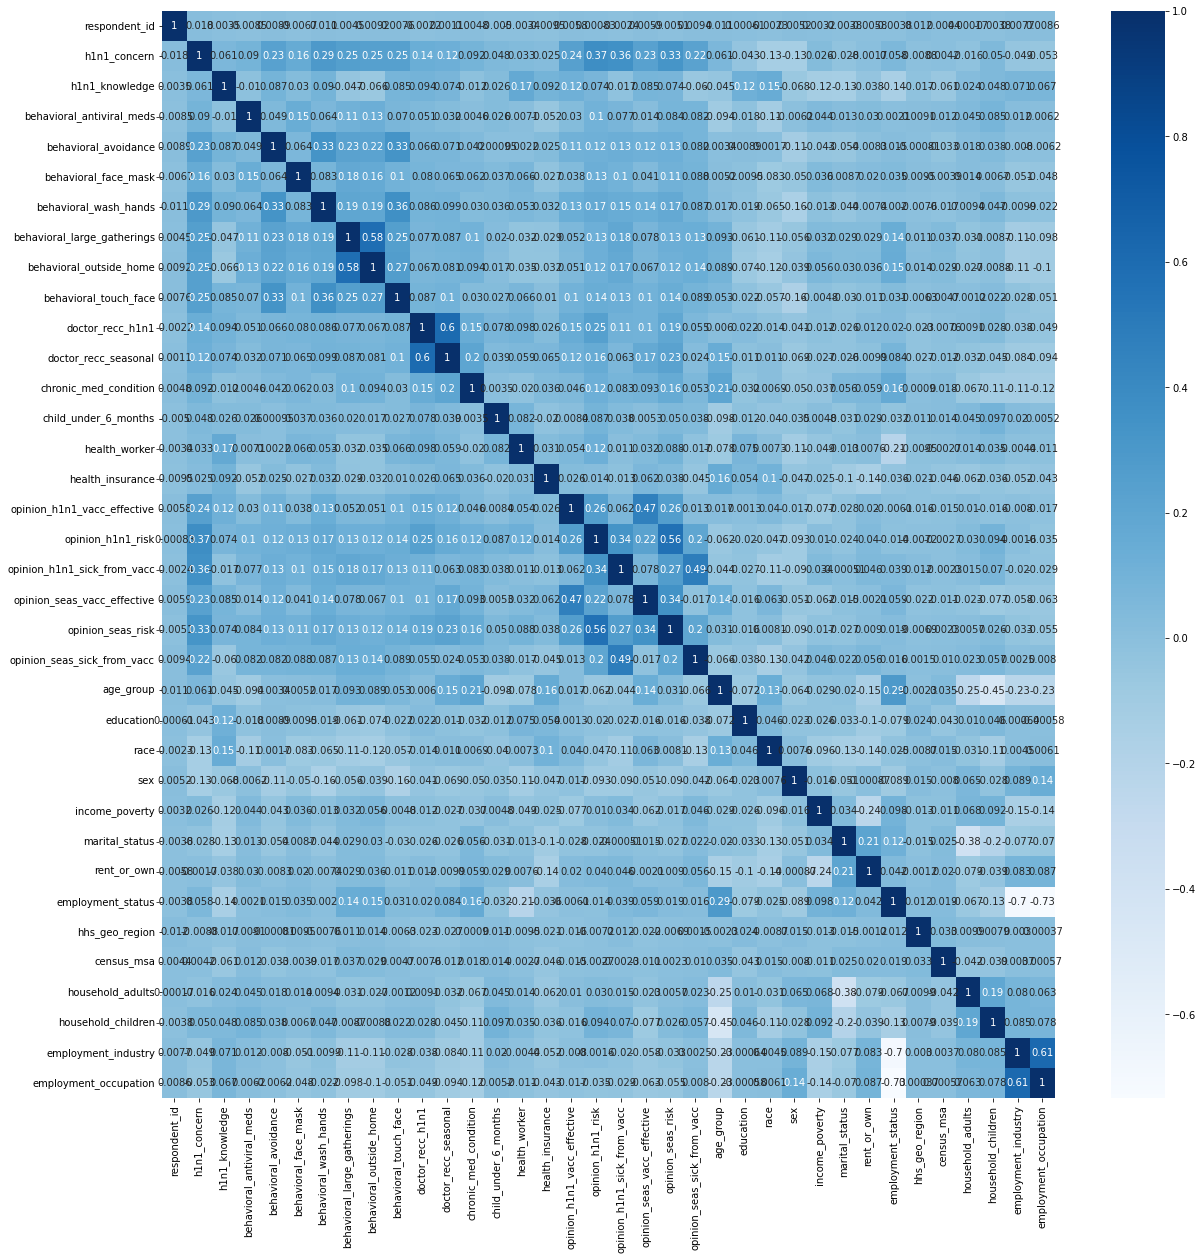

In [86]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Blues")

In [87]:
features.drop(['opinion_seas_sick_from_vacc','hhs_geo_region','census_msa',
               'household_adults','household_children','behavioral_antiviral_meds',
               'education'], axis = 1, inplace = True)

# MODEL

## Defining independent and dependent variables

In [88]:
X = features
y = labels

In [89]:
X

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_seas_risk,age_group,race,sex,income_poverty,marital_status,rent_or_own,employment_status,employment_industry,employment_occupation
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.00,0.75,1.000000,0.0,0.666667,1.0,0.5,0.666667,0.000000,0.000000
1,0.000037,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.25,0.25,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.619048,0.869565
2,0.000075,0.333333,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.714286,0.956522
3,0.000112,0.333333,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.75,1.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.000000,0.000000
4,0.000150,0.666667,0.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.00,0.50,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.904762,0.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.25,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,0.000000,0.000000
26703,0.999888,0.333333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.00,0.00,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.238095,0.130435
26704,0.999925,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.75,0.75,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.000000,0.000000
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,0.238095,0.304348


In [90]:
y

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


## Splitting the data into training and testing data

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

## Using Binary Relevance - Naive Bayes

In [92]:
# Gaussian Naive Bayes

# Initializing

model_BR_GNB = BinaryRelevance(GaussianNB())

# Training

model_BR_GNB.fit(x_train,y_train)

# Predicting

y_pred_BR_GNB = model_BR_GNB.predict(x_test)

# Testing

BR_GNB = accuracy_score(y_test,y_pred_BR_GNB)
BR_GNB

0.5986521901909397

## Using Binary Relevance - Decision Tree

In [93]:
# Initializing

model_BR_DT = BinaryRelevance(DecisionTreeClassifier())

# Training

model_BR_DT.fit(x_train,y_train)

# Predicting

y_pred_BR_DT = model_BR_DT.predict(x_test)

# Testing

BR_DT = accuracy_score(y_test,y_pred_BR_DT)
BR_DT

0.513540496692874

## Using Binary Relevance - Logistic Regression

In [94]:
# Initializing

model_BR_LR = BinaryRelevance(LogisticRegression())

# Training

model_BR_LR.fit(x_train,y_train)

# Predicting

y_pred_BR_LR = model_BR_LR.predict(x_test)

# Testing

BR_LR = accuracy_score(y_test,y_pred_BR_LR)
BR_LR

0.6716585548483714

## Using Classifier Chains - Naive Bayes

In [95]:
# Gaussian Naive Bayes

# Initializing

model_CC_GNB = ClassifierChain(GaussianNB())

# Training

model_CC_GNB.fit(x_train,y_train)

# Predicting

y_pred_CC_GNB = model_CC_GNB.predict(x_test)

# Testing

CC_GNB = accuracy_score(y_test,y_pred_CC_GNB)
CC_GNB

0.6036440783726444

## Using Classifier Chains - Decision Tree

In [96]:
# Initializing

model_CC_DT = ClassifierChain(DecisionTreeClassifier())

# Training

model_CC_DT.fit(x_train,y_train)

# Predicting

y_pred_CC_DT = model_CC_DT.predict(x_test)

# Testing

CC_DT = accuracy_score(y_test,y_pred_CC_DT)
CC_DT

0.5328840633969799

## Using Classifier Chains - Logistic Regression

In [97]:
# Initializing

model_CC_LR = ClassifierChain(LogisticRegression())

# Training

model_CC_LR.fit(x_train,y_train)

# Predicting

y_pred_CC_LR = model_CC_LR.predict(x_test)

# Testing

CC_LR = accuracy_score(y_test,y_pred_CC_LR)
CC_LR

0.6705353800074878

## Using Label Powerset - Naive Bayes

In [98]:
# Gaussian Naive Bayes

# Initializing

model_LP_GNB = LabelPowerset(GaussianNB())

# Training

model_LP_GNB.fit(x_train,y_train)

# Predicting

y_pred_LP_GNB = model_LP_GNB.predict(x_test)

# Testing

LP_GNB = accuracy_score(y_test,y_pred_LP_GNB)
LP_GNB

0.6003993510545363

## Using Label Powerset - Decision Tree

In [99]:
# Initializing

model_LP_DT = LabelPowerset(DecisionTreeClassifier())

# Training

model_LP_DT.fit(x_train,y_train)

# Predicting

y_pred_LP_DT = model_LP_DT.predict(x_test)

# Testing

LP_DT = accuracy_score(y_test,y_pred_LP_DT)
LP_DT

0.5384999376013977

## Random Forest

In [100]:
# Initializing

model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF = accuracy_score(y_test,y_pred_RF)
RF

0.6594284288031949

# MODEL EVALUATION

## Accuracy score comparison chart

In [101]:
Accuracy_Score = [BR_GNB,BR_DT,BR_LR,CC_GNB,CC_DT,CC_LR,LP_GNB,LP_DT,RF]
Models = ['BR Naive Bayes', 'BR Decision Tree' , 'BR Logistic Regression', 'CC Naive Bayes',
          'CC Decision Tree', 'CC Logistic Regression', 'LP Naive Bayes', 'LP Decision Tree','Random Forest']

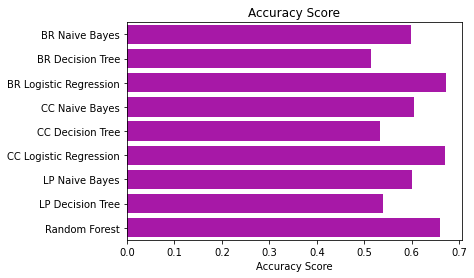

In [102]:
sns.barplot(Accuracy_Score, Models, color="m")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

#### RANDOM FOREST HAS THE HIGHEST ACCURACY SCORE